# Using APIs via Python

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hscells/apis-for-evidence-identification/blob/main/2-how/2-4-using-apis-via-python.ipynb) 

From now on, we'll use these interactive Jupyter notebooks so you can get a hands-on experience with the APIs. This Jupyter notebooks are interactive files that intermix code and content. You can click the button above to open this notebook in Google Colab, which is a free Jupyter notebook environment that runs in the cloud. You can also download these files if you have Jupyter installed in your computer and run them locally.

These notebooks are the equivalent to R notebooks in the Python world. For a quick overview of Python basics, some good resources include:

- [https://librarycarpentry.org/lc-python-intro/index.html](https://librarycarpentry.org/lc-python-intro/index.html)
- [https://www.learnpython.org/](https://www.learnpython.org/)
- [https://learnxinyminutes.com/docs/python/](https://learnxinyminutes.com/docs/python/)

If you are not just viewing this notebook, e.g., if you opened it in colab using the button above, notebooks cells can be run by putting your mouse cursor inside one of the cells and pressing `Shift + Enter`. You can also run cells by clicking the `Run` button if there is a toolbar above.

Start by running the cell below that sets up the environment for the rest of the notebook.

In [1]:
!pip install requests pandas -q
import requests
import pandas as pd

## Initial Exploration of the PubMed API

We'll now make the same request as before, but using the `requests` library with Python.

In [2]:
response = requests.get(  # GET request
    url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi",  # URL of the API
    params={  # Parameters of the request
        "db": "pubmed",
        "term": "diagnostic",
        "format": "json"
    }
).json()  # Parse the response as JSON
response

{'header': {'type': 'esearch', 'version': '0.3'},
 'esearchresult': {'count': '11808236',
  'retmax': '20',
  'retstart': '0',
  'idlist': ['38622011',
   '38621987',
   '38621906',
   '38621854',
   '38621841',
   '38621837',
   '38621836',
   '38621798',
   '38621795',
   '38621791',
   '38621790',
   '38621786',
   '38621783',
   '38621771',
   '38621761',
   '38621754',
   '38621739',
   '38621735',
   '38621734',
   '38621722'],
  'translationset': [{'from': 'diagnostic',
    'to': '"diagnosis"[MeSH Terms] OR "diagnosis"[All Fields] OR "diagnostic"[All Fields] OR "diagnostical"[All Fields] OR "diagnostically"[All Fields] OR "diagnostics"[All Fields]'}],
  'querytranslation': '"diagnosis"[MeSH Terms] OR "diagnosis"[All Fields] OR "diagnostic"[All Fields] OR "diagnostical"[All Fields] OR "diagnostically"[All Fields] OR "diagnostics"[All Fields]'}}

The only difference now is that we can directly manipulate the data that we got from the API. For example, we can extract from these results the number of articles that match our search term.

In [3]:
response["esearchresult"]["count"]

'11808236'

We can also extract the list of PMIDs that match our search term. 

In [4]:
response["esearchresult"]["idlist"]

['38622011',
 '38621987',
 '38621906',
 '38621854',
 '38621841',
 '38621837',
 '38621836',
 '38621798',
 '38621795',
 '38621791',
 '38621790',
 '38621786',
 '38621783',
 '38621771',
 '38621761',
 '38621754',
 '38621739',
 '38621735',
 '38621734',
 '38621722']

Note that we only get the first 20 PMIDs, as this is the default behavior of the API. We can change this by adding the `retmax` parameter to the request.

In [5]:
response = requests.get(  # GET request
    url="https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi",  # URL of the API
    params={  # Parameters of the request
        "db": "pubmed",
        "term": "diagnostic",
        "format": "json",
        "retmax": 100,  # <- We've changed the default value of 20 to 100
    }
).json()  # Parse the response as JSON
response["esearchresult"]["idlist"]

['38622011',
 '38621987',
 '38621906',
 '38621854',
 '38621841',
 '38621837',
 '38621836',
 '38621798',
 '38621795',
 '38621791',
 '38621790',
 '38621786',
 '38621783',
 '38621771',
 '38621761',
 '38621754',
 '38621739',
 '38621735',
 '38621734',
 '38621722',
 '38621710',
 '38621704',
 '38621702',
 '38621694',
 '38621693',
 '38621692',
 '38621689',
 '38621687',
 '38621686',
 '38621685',
 '38621682',
 '38621675',
 '38621655',
 '38621622',
 '38621589',
 '38621587',
 '38621586',
 '38621580',
 '38621579',
 '38621576',
 '38621561',
 '38621553',
 '38621551',
 '38621550',
 '38621521',
 '38621512',
 '38621506',
 '38621502',
 '38621495',
 '38621479',
 '38621473',
 '38621446',
 '38621440',
 '38621435',
 '38621400',
 '38621394',
 '38621391',
 '38621388',
 '38621375',
 '38621341',
 '38621340',
 '38621335',
 '38621334',
 '38621331',
 '38621327',
 '38622753',
 '38622745',
 '38622737',
 '38622727',
 '38622713',
 '38622711',
 '38622709',
 '38622699',
 '38622694',
 '38622685',
 '38622682',
 '38622681',

## Initial Exploration of the ClinicalTrials.gov API

We can also use the same code snippet to explore the ClinicalTrials.gov API. Let's start by searching for clinical trials that contain the term "heart attack".

In [6]:
response = requests.get(  # GET request
    url=" https://clinicaltrials.gov/api/v2/studies",  # URL of the API
    params={  # Parameters of the request
        "query.cond": "heart+attack",
        "pageSize": 20, 
        "format": "json",
        "countTotal": "true"
    }
).json()  # Parse the response as JSON

There are many more fields in this response, but we can extract the number of studies that match our search term, and the titles and IDs of the first 20 studies.

In [7]:
response["totalCount"]

3299

In [8]:
for study in response["studies"]:
    print(study["protocolSection"]["identificationModule"]["nctId"],
          study["protocolSection"]["identificationModule"]["officialTitle"])

NCT02137980 Registry of Non-primary Angioplasty at Hospitals Without Surgery On-site
NCT02762162 Online Assistance for Stent Thrombosis
NCT05435391 A Prospective, Multicenter, Observational Diagnostic Study to Externally Validate an Artificial Intelligence 12-lead Electrocardiogram Analysis Algorithm to Detect Patients With Acute Myocardial Infarction Who Visit Emergency Medical Center
NCT04335162 Cardiovascular Complications in Patients With COVID-19
NCT00305162 A Clinical Trial Comparing Cangrelor to Clopidogrel in Subjects Who Require Percutaneous Coronary Intervention (PCI).
NCT04127591 Differential Expression and Analysis of Peripheral Plasma Exosome miRNA in Patients With Myocardial Infarction
NCT04465591 Troponin T Fragmentation in the Assessment of Myocardial Injury Study
NCT01636180 Effect of the Repeated Loading Dose of Clopidogrel and High Dose of Clopidogrel Continuous Therapy on the Platelet Aggregation Inhibition in Patients With Myocardial Infarction Undergoing Intervent

Because we have all the data in a structured format, we can easily manipulate it. For example, we can extract the list of conditions that are being studied in these trials.

In [9]:
for study in response["studies"]:
    print(study["protocolSection"]["conditionsModule"]["conditions"])

['Coronary Artery Disease', 'Heart Attack', 'Angina']
['Acute Coronary Syndrome', 'Percutaneous Coronary Intervention', 'Myocardial Infarction']
['Myocardial Infarction or Chest Pain']
['COVID', 'Acute Coronary Syndrome', 'Myocardial Infarction', 'Myocarditis', 'Venous Thromboembolism', 'Deep Vein Thrombosis', 'Pulmonary Embolism']
['Myocardial Infarction (MI)', 'Acute Coronary Syndromes (ACS)']
['Myocardial Infarction']
['Acute Myocardial Infarction Type 1', 'Myocardial Injury']
['Acute Myocardial Infarction']
['Acute Coronary Syndrome']
['Coronary Disease', 'Cerebral Infarction', 'Ischemic Attack, Transient']
['STEMI - ST Elevation Myocardial Infarction']
['Acute Coronary Syndrome']
['Myocardial Infarction', 'Cardiovascular Death', 'Atherothrombosis', 'Stroke']
['Coronary Microvascular Disease', 'Ticagrelor', 'Thrombolysis', 'Microbubble Contrasted Echocardiography']
['Cardiogenic Shock', 'Acute Myocardial Infarction', 'STEMI - ST Elevation Myocardial Infarction', 'NSTEMI - Non-ST Se

We can even start to make some simple analyses. For example, we can count the number of studies that are being conducted in each country.

In [10]:
from collections import Counter

# Stores the number of studies per country
countries = Counter()

# Iterates over the studies
for study in response["studies"]:
    locations = study["protocolSection"]["contactsLocationsModule"]
    if "locations" in locations:  # Some studies don't have location information
        location = study["protocolSection"]["contactsLocationsModule"]["locations"]
        for loc in location:  # Some studies have multiple locations
            if "country" in loc:  # Some locations don't have country information
                countries.update([loc["country"]])  # Increments the count of studies in this country

df_countries = pd.DataFrame.from_records(countries.most_common(), columns=["Country", "Count"])
df_countries

,Country,Count
0,United States,396
1,Japan,73
2,Germany,64
3,Canada,50
4,Netherlands,41
5,Poland,37
6,Australia,36
7,France,34
8,United Kingdom,31
9,Italy,28


We can even plot this data to make it easier to understand.

<Axes: xlabel='Country'>

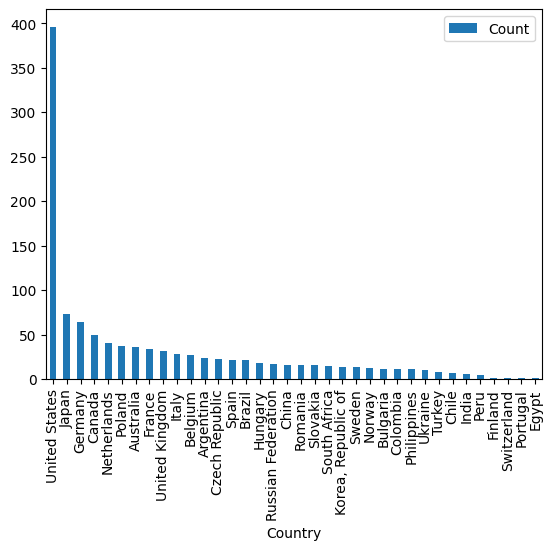

In [11]:
df_countries.plot(x="Country", y="Count", kind="bar")

## Summary

In this notebook, we've learned the basics for how to interact with APIs in Python and perform some basic analysis. In the next chapter, we'll build on these concepts to show some real use-cases for these APIs.

---
[top](https://github.com/hscells/apis-for-evidence-identification#table-of-contents)<br/>
[previous: Using APIs via HTTPie](https://github.com/hscells/apis-for-evidence-identification/blob/main/2-how/2-3-using-apis-via-httpie.md)<br/>
[next: Searching PubMed](https://github.com/hscells/apis-for-evidence-identification/blob/main/3-use-cases/3-1-searching-pubmed.ipynb)<br/>